In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.path.realpath('../__file__'))

Error trying to connect to ACT-R at 127.0.0.1 : 2651 with exception (<class 'ConnectionRefusedError'>, ConnectionRefusedError(111, 'Connection refused'), <traceback object at 0x7f45db3aa600>)
ACT-R connection NOT established, but no exception detected or already handled.
Could not start ACT-R connection.


In [2]:
def simulate_transition_probability(**params): 
    m = MarkovSimulation.run_single_simulation(model='markov-ibl-mb', verbose=False, **params)

    p_table = pd.DataFrame([s._p for s in m.log], index=range(len(m.log)))
    p_table['index_bin'] = pd.cut(p_table.index, 5, labels=False, ordered=False, right=False)
    p_table = p_table.melt(id_vars=['index_bin'], var_name='state_transition', value_name='probability')
    p_table['temperature'] = m.task_parameters['temperature']
    p_table['decay'] = m.task_parameters['decay']
    return p_table

def plot_transition_probability(p_table):
    g = sns.FacetGrid(df, col='temperature', row='decay')
    g.map_dataframe(sns.lineplot, x='index_bin', y='probability', hue='state_transition', markers=True, dashes=True)
    g.refline(y=0.7)
    g.refline(y=0.3)

    g.add_legend()
    g.tight_layout()
    g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
    g.fig.suptitle('IBL-MB transition probability')
    plt.show()

In [3]:
temperatures = np.linspace(0.1,1.5,5)
decays = np.linspace(0.1,1.5, 5)

df = pd.concat([simulate_transition_probability(temperature=t, decay=d) for t in temperatures for d in decays], axis=0).round(2)

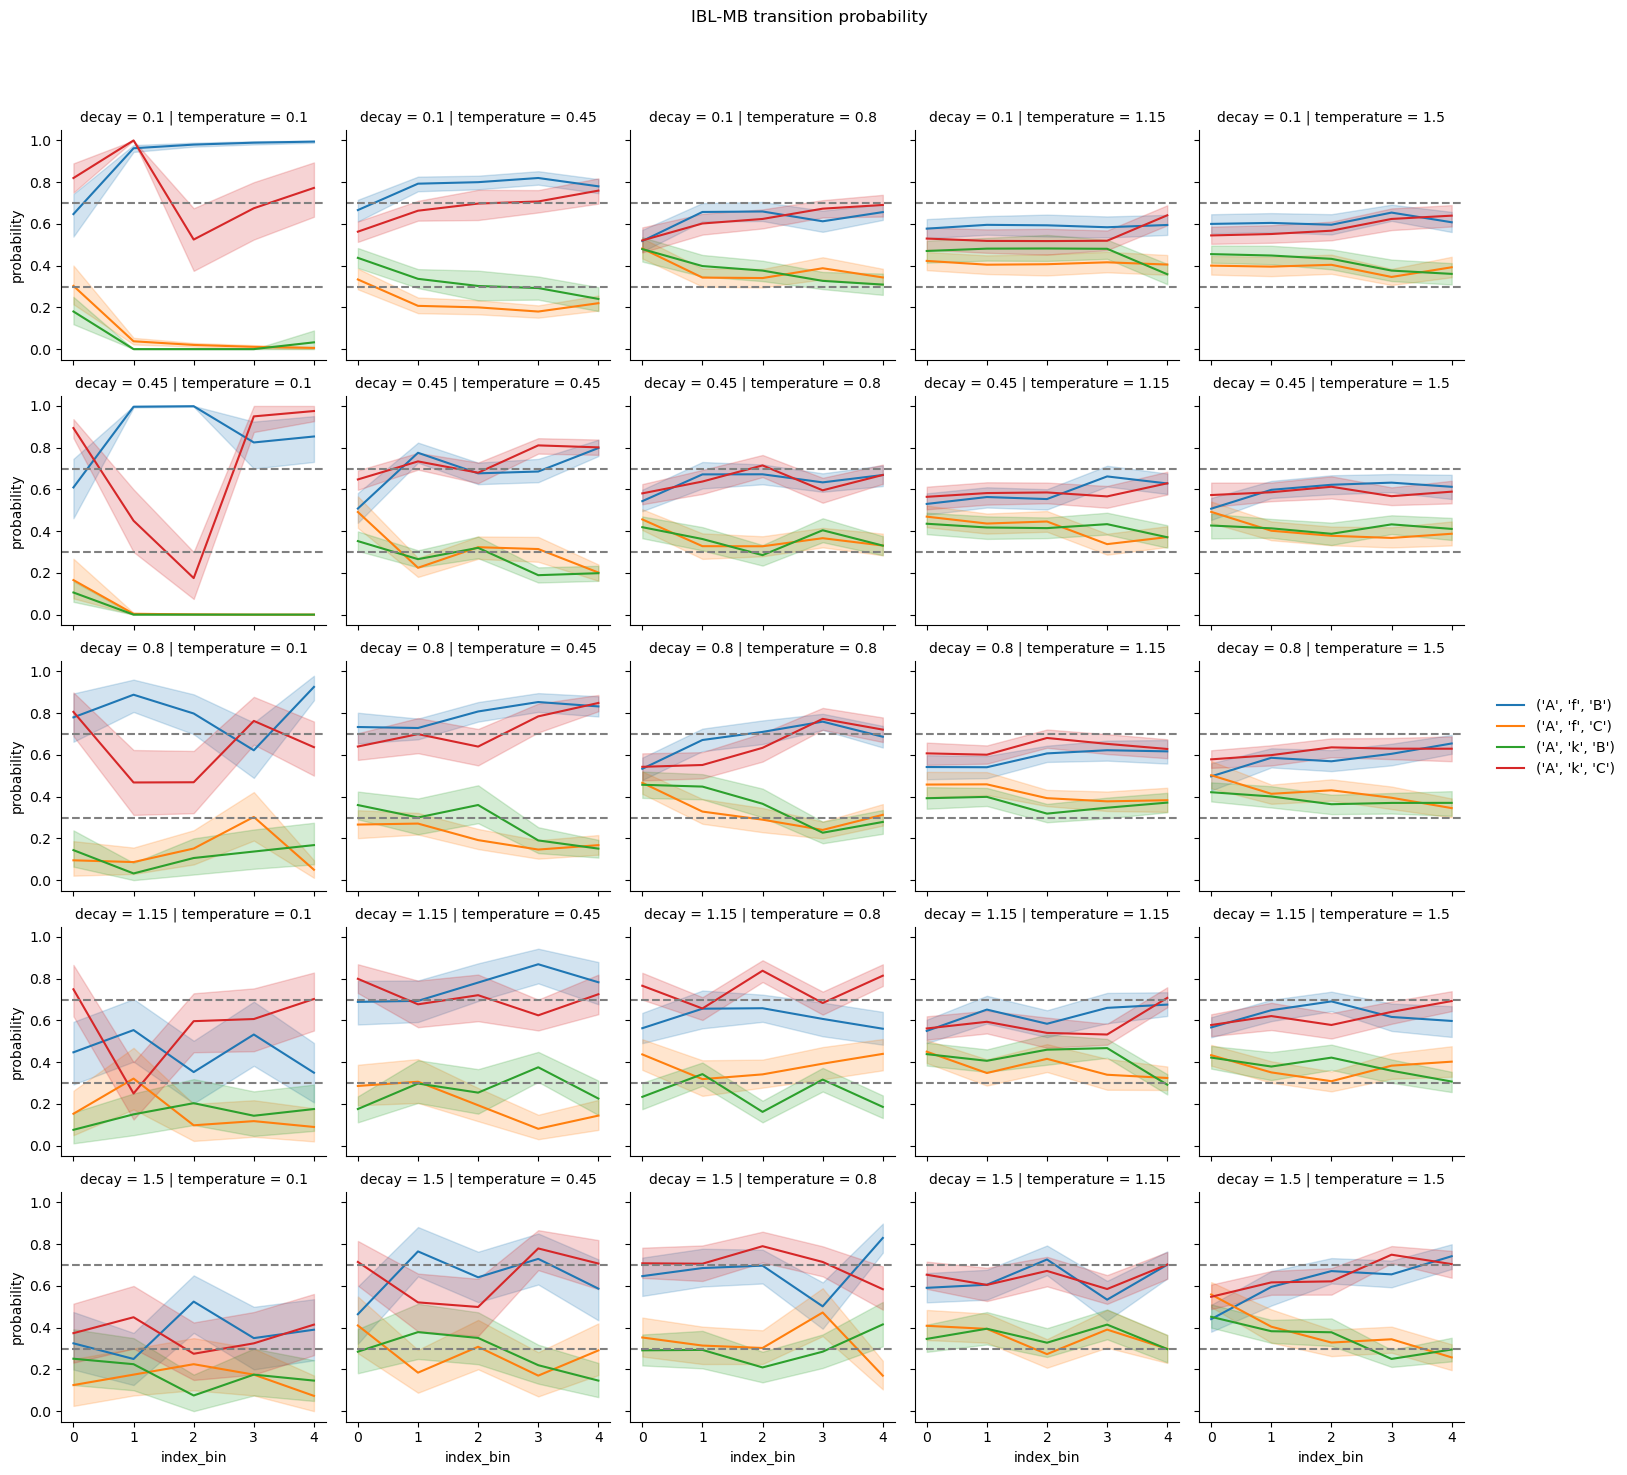

In [5]:
plot_transition_probability(df)